In [1]:
using PyPlot
using LaTeXStrings
using Measurements

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/kunchen/.julia/packages/PyPlot/XaELc/src/init.jl:198


In [2]:
include("Kplot.jl")

In [97]:
#para = ParaMC(rs = 5.0, Fs =-1.0, beta =100.0, mass2=1.0e-5, order = 2)
#Zrenorm = true

para = ParaMC(rs = 5.0, Fs =-1.0, beta =100.0, mass2=1.0e-5, order = 2)
Zrenorm = true

Base.Iterators.Pairs{Symbol, Real, Tuple{Symbol, Symbol}, NamedTuple{(:Λs, :spin), Tuple{Float64, Int64}}}(:Λs => 1.0e-5, :spin => 2)


true

In [98]:
rsigma, isigma, kgrid = process(para, Zrenorm)

Onebody counterterm:
order 1:  δμ = -0.39708 ± 0.00052, δz = -0.55107 ± 0.00088
Onebody counterterm:
order 1:  δμ = -0.39708 ± 0.00052, δz = -0.55107 ± 0.00088


(Any[Measurement{Float64}[0.48633 ± 0.00012 0.48328 ± 0.00012 … 0.19666 ± 0.0001 0.169533 ± 0.0001; 0.4865 ± 0.00012 0.48345 ± 0.00012 … 0.19665 ± 0.0001 0.169536 ± 0.0001], Measurement{Float64}[-0.32333 ± 0.00099 -0.32244 ± 0.00098 … -0.19069 ± 0.00043 -0.1739 ± 0.00039; -0.32323 ± 0.00099 -0.32291 ± 0.00098 … -0.19061 ± 0.00043 -0.17405 ± 0.00039]], Any[Measurement{Float64}[0.00239571 ± 7.0e-7 0.00241102 ± 6.8e-7 … 0.00040607 ± 2.4e-7 0.00027256 ± 1.8e-7; 0.0070606 ± 2.1e-6 0.0071051 ± 2.0e-6 … 0.00121705 ± 7.2e-7 0.00081767 ± 5.4e-7], Measurement{Float64}[0.000284 ± 1.2e-5 0.000265 ± 1.2e-5 … -0.0001729 ± 1.8e-6 -0.0001763 ± 1.3e-6; 0.000633 ± 3.3e-5 0.000643 ± 3.2e-5 … -0.0005274 ± 5.3e-6 -0.0005305 ± 3.8e-6]], [0.0, 0.07072564081837611, 0.1414512816367522, 0.21217692245512831, 0.2438063905795529, 0.27543585870397747, 0.30706532682840204, 0.3326541040641022, 0.35824288129980236, 0.38383165853550255, 0.4094204357712027, 0.4350092130069029, 0.46059799024260306, 0.5159280316103827, 0.

In [99]:
dim, β, kF = para.dim, para.β, para.kF
kF_label = searchsortedfirst(kgrid.grid, kF)

10

In [100]:
# Vibrant qualitative colour scheme from https://personal.sron.nl/~pault/
cdict=Dict(["blue" => "#0077BB", "cyan" => "#33BBEE", "teal" => "#009988", "orange" => "#EE7733", "red"=> "#CC3311", "magenta"=>"#EE3377", "grey"=>"#BBBBBB"]);

# Plot $\frac{\partial \Sigma(k, i\omega_0)}{\partial i\omega}$ as a function $k$

In [101]:
Sw_k = []
for val in isigma
    push!(Sw_k, zfactor(val, para))
end

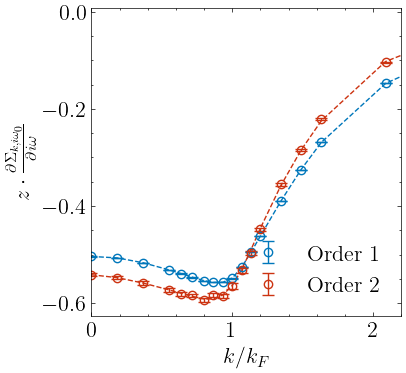

Any[-0.54936 ± 0.00031, -0.5647 ± 0.0055]


In [102]:
interp = pyimport("scipy.interpolate")
style = PyPlot.matplotlib."style"
style.use(["science", "std-colors"])
color = [cdict["blue"], cdict["red"]]
#cmap = get_cmap("Paired")
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
figure(figsize=(4,4))
dZ = []
for o in 1:para.order
    y = sum([-z.val for z in Sw_k[j]] for j in 1:o)
    #y = [-z.val for z in Sw_k[o]]
    e = [z.err for z in Sw_k[o]]
    errorbar(kgrid.grid / kF, y, yerr=e, color=color[o], capsize=4, fmt="o", markerfacecolor="none", label="Order $o")
    push!(dZ, measurement(y[kF_label], e[kF_label]))
    # yfit = signal.savgol_filter(y, 5, 3)
    x = kgrid.grid / kF
    spl = interp.UnivariateSpline(x, y, w=1.0 ./ e)
    yfit = spl(x)
    plot(x, yfit, color=color[o], linestyle="--")
end
xlim([kgrid.grid[1] / kF, 2.2])
#ylim([-1.0, 0.0])
xlabel(L"$k/k_F$")
    
if Zrenorm
    ylabel(L"$z \cdot \frac{\partial \Sigma_{k, i\omega_0}}{\partial i \omega}$")
else
    ylabel(L"$\frac{\partial \Sigma_{k, i\omega_0}}{\partial i \omega}$")
end
legend(loc=4)
#savefig("sigmaZ_rs$(para.rs)_Fs$(para.Fs)_$(para.dim)d.pdf")
println(dZ)
#plot.plt.show()

# Plot $Re\Sigma(k, i\omega_0)$ as a function $k$

In [103]:
S_k = []
for val in rsigma
    #push!(S_k, val[1, :].-val[1, kF_label])
    push!(S_k, val[1, :].-val[1, 1])
    #push!(S_k, val[1, :])
end

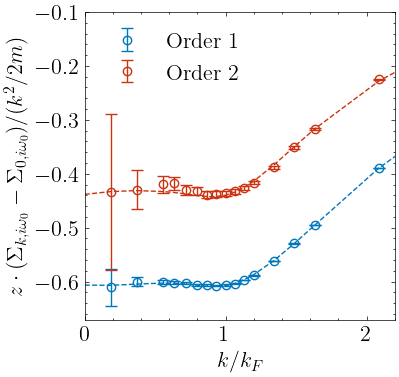

Any[-0.6065 ± 0.0011, -0.4361 ± 0.0047]


In [104]:
interp = pyimport("scipy.interpolate")
style = PyPlot.matplotlib."style"
style.use(["science", "std-colors"])
color = [cdict["blue"], cdict["red"]]
#cmap = get_cmap("Paired")
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
figure(figsize=(4,4))
dmp = []
for o in 1:para.order
    y = sum([z.val for z in S_k[j]] for j in 1:o)
    #y = [z.val for z in S_k[o]]
    e = [z.err for z in S_k[o]]
    #y ./= para.EF
    #e ./=para.EF
    y ./= (kgrid.grid).^2/(2*para.me)
    e ./= (kgrid.grid).^2/(2*para.me)
    # println(zk[o])
    errorbar(kgrid.grid / kF, y, yerr=e, color=color[o], capsize=4, fmt="o", markerfacecolor="none", label="Order $o")
    push!(dmp, measurement(y[kF_label], e[kF_label]))
    # yfit = signal.savgol_filter(y, 5, 3)
    x = kgrid.grid / kF
    y[1:3] .= y[kF_label]
    e[1:3] .= e[kF_label]
    spl = interp.UnivariateSpline(x, y, w=1.0 ./ e)
    yfit = spl(x)
    plot(x, yfit, color=color[o], linestyle="--")
    #println(y)
    #println(yfit)
end
#xlim([kgrid.grid[1] / kF, kgrid.grid[end] / kF])
xlim([kgrid.grid[1] / kF, 2.2])
#ylim([-1.0, 0.0])
xlabel(L"$k/k_F$")
    
if Zrenorm
    ylabel(L"$z \cdot (\Sigma_{k, i\omega_0}-\Sigma_{0, i\omega_0})/(k^2/2m)$")
else
    ylabel(L"$(\Sigma_{k, i\omega_0}-\Sigma_{0, i\omega_0})/(k^2/2m)$")
end
legend(loc=2)
#savefig("sigmaK_rs$(para.rs)_Fs$(para.Fs)_$(para.dim)d.pdf")
println(dmp)

In [109]:
println(dZ)
if Zrenorm == false
    z = @. 1.0/(1.0-dZ)
    m = @. 1.0/((1.0-dmp)/(1.0-dZ))
    #m = @. 1.0/(z*(1.0-dm))
    println("zfactor: $z")
    println("massratio: $m")
else
    z = @. 1.0+dZ
    m = @. ((1.0+dmp)/(1.0+dZ))
    println("zfactor: $z")
    println("massratio: $m")
end

Any[-0.54936 ± 0.00031, -0.5647 ± 0.0055]
zfactor: Measurement{Float64}[0.45064 ± 0.00031, 0.4353 ± 0.0055]
massratio: Measurement{Float64}[0.8733 ± 0.0025, 1.295 ± 0.02]


# Effective Mass

In [106]:
S_m = []
for val in rsigma
    push!(S_m, @. (val[1, :]-val[1, kF_label])/(kgrid.grid-kgrid.grid[kF_label])*para.me/para.kF)
end

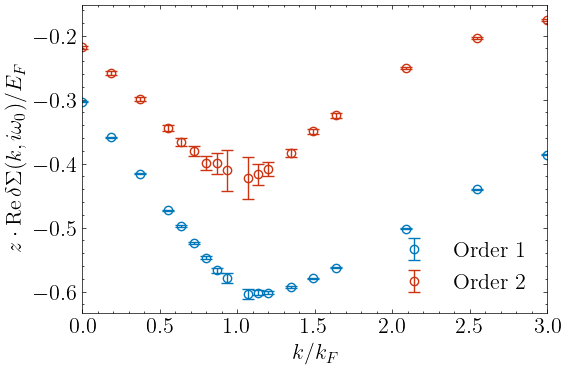

Any[-0.5788 ± 0.0078, -0.411 ± 0.032]
Any[-0.6034 ± 0.0078, -0.423 ± 0.033]
Any[-0.591 ± 0.02, -0.417 ± 0.039]


In [107]:
interp = pyimport("scipy.interpolate")
style = PyPlot.matplotlib."style"
style.use(["science", "std-colors"])
color = [cdict["blue"], cdict["red"]]
#cmap = get_cmap("Paired")
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
figure(figsize=(6,4))
dm1, dm2, dm3 = [], [], []
for o in 1:para.order
    y = sum([z.val for z in S_m[j]] for j in 1:o)
    e = [z.err for z in S_m[o]]
    errorbar(kgrid.grid / kF, y, yerr=e, color=color[o], capsize=4, fmt="o", markerfacecolor="none", label="Order $o")
    push!(dm1, measurement(y[kF_label-1], e[kF_label-1]))
    push!(dm2, measurement(y[kF_label+1], e[kF_label+1]))
    push!(dm3, measurement((y[kF_label+1]+y[kF_label-1])/2, (e[kF_label+1]+e[kF_label-1])/2+abs(y[kF_label+1]-y[kF_label-1])/2))
    # yfit = signal.savgol_filter(y, 5, 3)
    #x = kgrid.grid 
    #spl = interp.UnivariateSpline(x, y, w=1.0 ./ e).derivative(n=1)
    #yfit = spl(x)*para.me/para.kF
    #plot(x/kF, yfit, color=color[o], linestyle="--")
end
#xlim([kgrid.grid[1] / kF, kgrid.grid[end] / kF])
xlim([kgrid.grid[1] / kF, 3.0])
#ylim([-1.0, 0.0])
xlabel(L"$k/k_F$")
    
if Zrenorm
    ylabel(L"$z \cdot \operatorname{Re}\delta \Sigma(k, i\omega_0)/E_F$")
else
    ylabel(L"$(\Sigma_{k, i\omega_0}-\Sigma_{0, i\omega_0})/(k^2/2m)$")
end
legend(loc=4)
#savefig("sigmaK_rs$(para.rs)_Fs$(para.Fs)_$(para.dim)d.pdf")
println(dm1)
println(dm2)
println(dm3)

In [108]:
if Zrenorm == false
    z = @. 1.0/(1.0-dZ)
    #m = @. 1.0/((1.0-dm)/(1.0-dZ))
    m1 = @. 1.0/(z*(1.0-dm1))
    m2 = @. 1.0/(z*(1.0-dm2))
    m3 = @. 1.0/(z*(1.0-dm3))
    println("zfactor: $z")
    println("massratio: $m1")
    println("massratio: $m2")
    println("massratio: $m3")
end

In [34]:
1-0.5

0.5